# Data Cleaning Process

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

Load the data and see the first few rows of the data to understand the data structure.

In [4]:
df1 = pd.read_csv("NY-House-Dataset.csv")
df1.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Diplay the shape of the dataset

In [6]:
df1.shape

(4801, 17)

Drop the columns that are not going to be useful for the prediction and show how the resulting dataset looks like.

In [8]:
df2 = df1.drop(['BROKERTITLE', 'TYPE', 'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2', 'LOCALITY', 'FORMATTED_ADDRESS'], axis='columns')
df2.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.0,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483
1,195000000,7,10.000000,17545.0,New York County,New York,West 57th Street,40.766393,-73.980991
2,260000,4,2.000000,2015.0,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109
3,69000,3,1.000000,445.0,New York County,New York,East 55th Street,40.761398,-73.974613
4,55000000,7,2.373861,14175.0,New York County,New York,East 64th Street,40.767224,-73.969856


Check if there are rows with missing values, if they exist, drop them.

In [9]:
df2.isnull().sum()

PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
SUBLOCALITY     0
STREET_NAME     0
LONG_NAME       0
LATITUDE        0
LONGITUDE       0
dtype: int64

Since they are not NaN values of any columns, we're not going to fill with any medium value. After dropping the rows if needed, display the types of the columns and the shape of the dataset.

In [15]:
df2.dtypes
df2.shape

PRICE             int64
BEDS              int64
BATH            float64
PROPERTYSQFT    float64
SUBLOCALITY      object
STREET_NAME      object
LONG_NAME        object
LATITUDE        float64
LONGITUDE       float64
dtype: object

Take a look of how the dataset is looking up to this point after dropping some columns and rows.

In [16]:
df2.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE
0,315000,2,2.000000,1400.0,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483
1,195000000,7,10.000000,17545.0,New York County,New York,West 57th Street,40.766393,-73.980991
2,260000,4,2.000000,2015.0,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109
3,69000,3,1.000000,445.0,New York County,New York,East 55th Street,40.761398,-73.974613
4,55000000,7,2.373861,14175.0,New York County,New York,East 64th Street,40.767224,-73.969856


We can see that the column 'BATH' is a float type, but it should be an integer. We're going to convert it to integer. But first let's understand where this float values are coming from.

In [17]:
df2['BATH'].unique()

array([ 2.        , 10.        ,  1.        ,  2.37386086, 16.        ,
        3.        ,  4.        ,  6.        ,  8.        ,  5.        ,
        9.        ,  7.        , 32.        , 13.        , 50.        ,
       20.        , 11.        , 12.        , 24.        , 43.        ,
        0.        , 17.        ])

There's only one row with a float value in the 'BATH' column. That's '2.3738...', this should only be '2'. We're going to convert this value to '2' converting the column to integer type.

In [21]:
#Convert the BATH column to int64
df2.BATH = df2.BATH.astype('int64')
df2.BATH.unique()

array([ 2, 10,  1, 16,  3,  4,  6,  8,  5,  9,  7, 32, 13, 50, 20, 11, 12,
       24, 43,  0, 17])

We're going to create the column of 'PRICE_PER_SQFT', because in real state markets, the price of each square feet is very important, and that should be included in our dataframe.

In [23]:
df3 = df2.copy()
df3['PRICE_PER_SQFT'] = df3['PRICE']/df3['PROPERTYSQFT']
df3.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,STREET_NAME,LONG_NAME,LATITUDE,LONGITUDE,PRICE_PER_SQFT
0,315000,2,2,1400.0,Manhattan,East 55th Street,Regis Residence,40.761255,-73.974483,225.000000
1,195000000,7,10,17545.0,New York County,New York,West 57th Street,40.766393,-73.980991,11114.277572
2,260000,4,2,2015.0,Richmond County,Staten Island,Sinclair Avenue,40.541805,-74.196109,129.032258
3,69000,3,1,445.0,New York County,New York,East 55th Street,40.761398,-73.974613,155.056180
4,55000000,7,2,14175.0,New York County,New York,East 64th Street,40.767224,-73.969856,3880.070547


We can notice that the latitude and longitude are not exactly significant for the prediction, because this is included in the 'SUBLOCALITY'. But for technical reasons, let's check if there's a significant variation in the latitude and longitude values. If there's not, we're going to drop these columns.

In [30]:
df3['LATITUDE'].var()
df3['LONGITUDE'].var()

0.010217668066549411

We can see that the variance of both columns is significantly low, in the case that this values were important, we would have to normalize them. But since they are not, we're going to drop them.

In [34]:
df3 = df3.drop(['LATITUDE', 'LONGITUDE'], axis='columns')
df3.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,STREET_NAME,LONG_NAME,PRICE_PER_SQFT
0,315000,2,2,1400.0,Manhattan,East 55th Street,Regis Residence,225.000000
1,195000000,7,10,17545.0,New York County,New York,West 57th Street,11114.277572
2,260000,4,2,2015.0,Richmond County,Staten Island,Sinclair Avenue,129.032258
3,69000,3,1,445.0,New York County,New York,East 55th Street,155.056180
4,55000000,7,2,14175.0,New York County,New York,East 64th Street,3880.070547


Now, for the 'SUBLOCALITY' column, we're going to check the unique values and the number of unique values. This is because we're going to use one hot encoding to convert this column to numerical values.

In [68]:
len(df3.SUBLOCALITY.unique())
sublocality_stats = df3.groupby('SUBLOCALITY')['SUBLOCALITY'].agg('count').sort_values(ascending=False)
sublocality_stats

SUBLOCALITY
Manhattan        1323
Queens           1245
Brooklyn         1198
Staten Island     539
Bronx             496
Name: SUBLOCALITY, dtype: int64

So, we can notice that the same location has been written ways. We need to make some changes to this column to make it more consistent. Especially because we know that they're only 5 which are:
- 'BRONX'
- 'BROOKLYN'
- 'MANHATTAN'
- 'QUEENS'
- 'STATEN ISLAND'

In [67]:
#The rows with the name of sublocality as "East Bronx" or "Bronx County" should only be "Bronx"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Bronx' if x=='East Bronx' or x=='Bronx County' or x=="The Bronx" else x)

#"Queens County" should only be "Queens"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Queens' if x=='Queens County' else x)

#"Kings County" should only be "Brooklyn"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Brooklyn' if x=='Kings County' else x)

#"New York County" should only be "Manhattan"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Manhattan' if x=='New York County' else x)

#"New York" should only be "Manhattan
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Manhattan' if x=='New York' else x)

#"Richmond County" should only be "Staten Island"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Staten Island' if x=='Richmond County' else x)

#"Brooklyn Heights" should only be "Brooklyn"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Brooklyn' if x=='Brooklyn Heights' else x)

#"Flushing" should only be "Queens"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Queens' if x=='Flushing' else x)

#"Riverdale" should only be "Bronx"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Bronx' if x=='Riverdale' else x)

#"Coney Island" should only be "Brooklyn"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Brooklyn' if x=='Coney Island' else x)

#"Dumbo" should only be "Brooklyn"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Brooklyn' if x=='Dumbo' else x)

#Fort Hamilton" should only be "Brooklyn"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Brooklyn' if x=='Fort Hamilton' else x)

#"Jackson Heights" should only be "Queens"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Queens' if x=='Jackson Heights' else x)

#"Rego Park" should only be "Queens"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Queens' if x=='Rego Park' else x)

#"Synder Avenue" should only be "Brooklyn"
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Brooklyn' if x=='Snyder Avenue' else x)

After correcting every SUBLOCALITY, let's see how it looks now.

In [69]:
len(df3.SUBLOCALITY.unique())
sublocality_stats = df3.groupby('SUBLOCALITY')['SUBLOCALITY'].agg('count').sort_values(ascending=False)
sublocality_stats

SUBLOCALITY
Manhattan        1323
Queens           1245
Brooklyn         1198
Staten Island     539
Bronx             496
Name: SUBLOCALITY, dtype: int64

In [70]:
df3.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,STREET_NAME,LONG_NAME,PRICE_PER_SQFT
0,315000,2,2,1400.0,Manhattan,East 55th Street,Regis Residence,225.000000
1,195000000,7,10,17545.0,Manhattan,New York,West 57th Street,11114.277572
2,260000,4,2,2015.0,Staten Island,Staten Island,Sinclair Avenue,129.032258
3,69000,3,1,445.0,Manhattan,New York,East 55th Street,155.056180
4,55000000,7,2,14175.0,Manhattan,New York,East 64th Street,3880.070547


Since we have a lot of street name and long names, we're going to use for the locality feature only the first word of the SUBLOCALITY. This is because we know that the first word is the most important one in the address.

In [75]:
df3 = df3.drop(columns=['STREET_NAME', 'LONG_NAME'])
df3.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,315000,2,2,1400.0,Manhattan,225.000000
1,195000000,7,10,17545.0,Manhattan,11114.277572
2,260000,4,2,2015.0,Staten Island,129.032258
3,69000,3,1,445.0,Manhattan,155.056180
4,55000000,7,2,14175.0,Manhattan,3880.070547


Now the dataframe is all clean, we need to search for outliers. We're going to use the z-score to find the outliers. But first, let's check the distribution of the 'PROPERTYSQFT' column.

In [77]:
df3.PROPERTYSQFT.describe()

count     4801.000000
mean      2184.207862
std       2377.140894
min        230.000000
25%       1200.000000
50%       2184.207862
75%       2184.207862
max      65535.000000
Name: PROPERTYSQFT, dtype: float64

Let's define our remove outliers that will check for each sublocality if there are outliers and remove them.

In [82]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('SUBLOCALITY'):
        m = np.mean(subdf.PROPERTYSQFT)
        st = np.std(subdf.PROPERTYSQFT)
        reduced_df = subdf[(subdf.PROPERTYSQFT>(m-st)) & (subdf.PROPERTYSQFT<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df4 = remove_pps_outliers(df3)
df4.shape


(4553, 6)

Now that the outliers are removed, let's plot the scatter plot for the 'BEDS' and 'PROPERTYSQFT' columns.

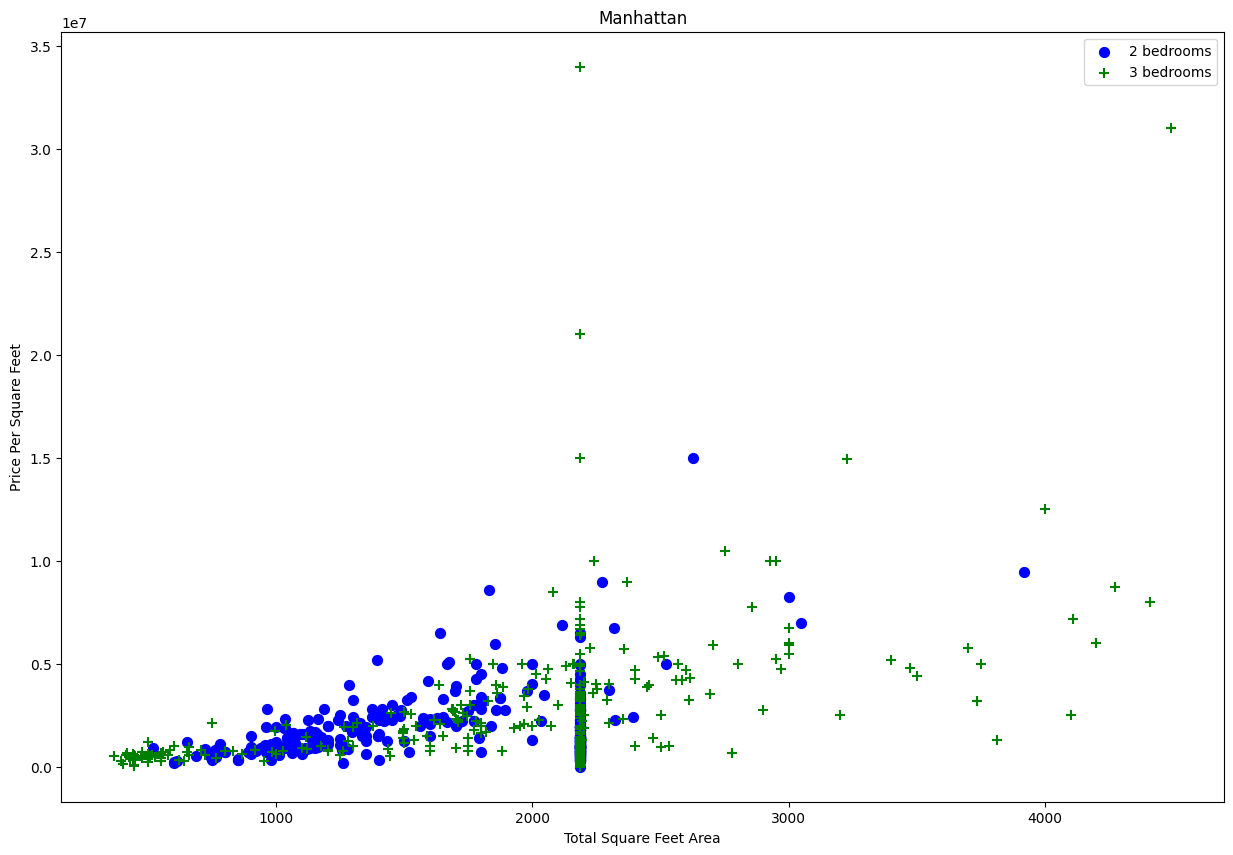

In [87]:
def plot_scatter_chart(df, sublocality):
    bedrooms2 = df[(df.SUBLOCALITY==sublocality) & (df.BEDS==2)]
    bedrooms3 = df[(df.SUBLOCALITY==sublocality) & (df.BEDS==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(
        bedrooms2.PROPERTYSQFT,
        bedrooms2.PRICE,
        color='blue',
        label='2 bedrooms',
        s=50
    )
    plt.scatter(
        bedrooms3.PROPERTYSQFT,
        bedrooms3.PRICE,
        marker='+',
        color='green',
        label='3 bedrooms',
        s=50
    )
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(sublocality)
    plt.legend()

plot_scatter_chart(df4, "Manhattan")

Now we can see that the're are some outliers in the 'BEDS' column. We're going to remove them.
Remove the houses of 2 bedrooms whose 'PRICE_PER_SQFT' is less than the mean 'PRICE_PER_SQFT' of 1 bedroom houses.

In [88]:
def remove_bed_outliers(df):
    exclude_indices = np.array([])
    for sublocality, sublocality_df in df.groupby('SUBLOCALITY'):
        beds_stats = {}
        for beds, beds_df in sublocality_df.groupby('BEDS'):
            beds_stats[beds] = {
                'mean': np.mean(beds_df.PRICE_PER_SQFT),
                'std': np.std(beds_df.PRICE_PER_SQFT),
                'count': beds_df.shape[0]
            }
        for beds, beds_df in sublocality_df.groupby('BEDS'):
            stats = beds_stats.get(beds-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(
                    exclude_indices,
                    beds_df[beds_df.PRICE_PER_SQFT<(stats['mean'])].index.values
                )
    return df.drop(exclude_indices, axis='index')

df5 = remove_bed_outliers(df4)
df5.shape

(2649, 6)

After removing the outliers, let's plot the scatter plot for the 'BEDS' and 'PROPERTYSQFT' columns again.

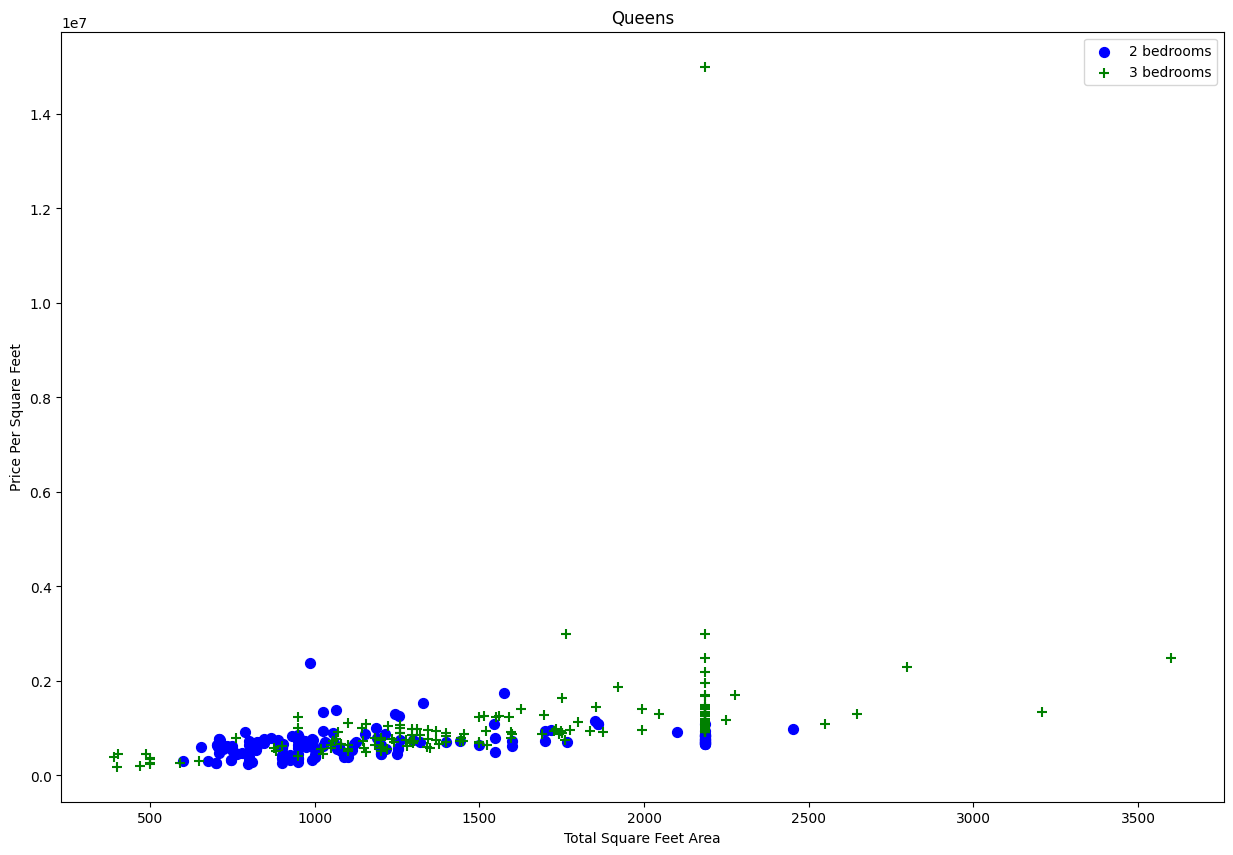

In [104]:
plot_scatter_chart(df5, "Queens")

Something is clearly wrong with the 'PROPERTYSQFT' column. We're going to remove the outliers of this column using the z-score.

(2609, 6)

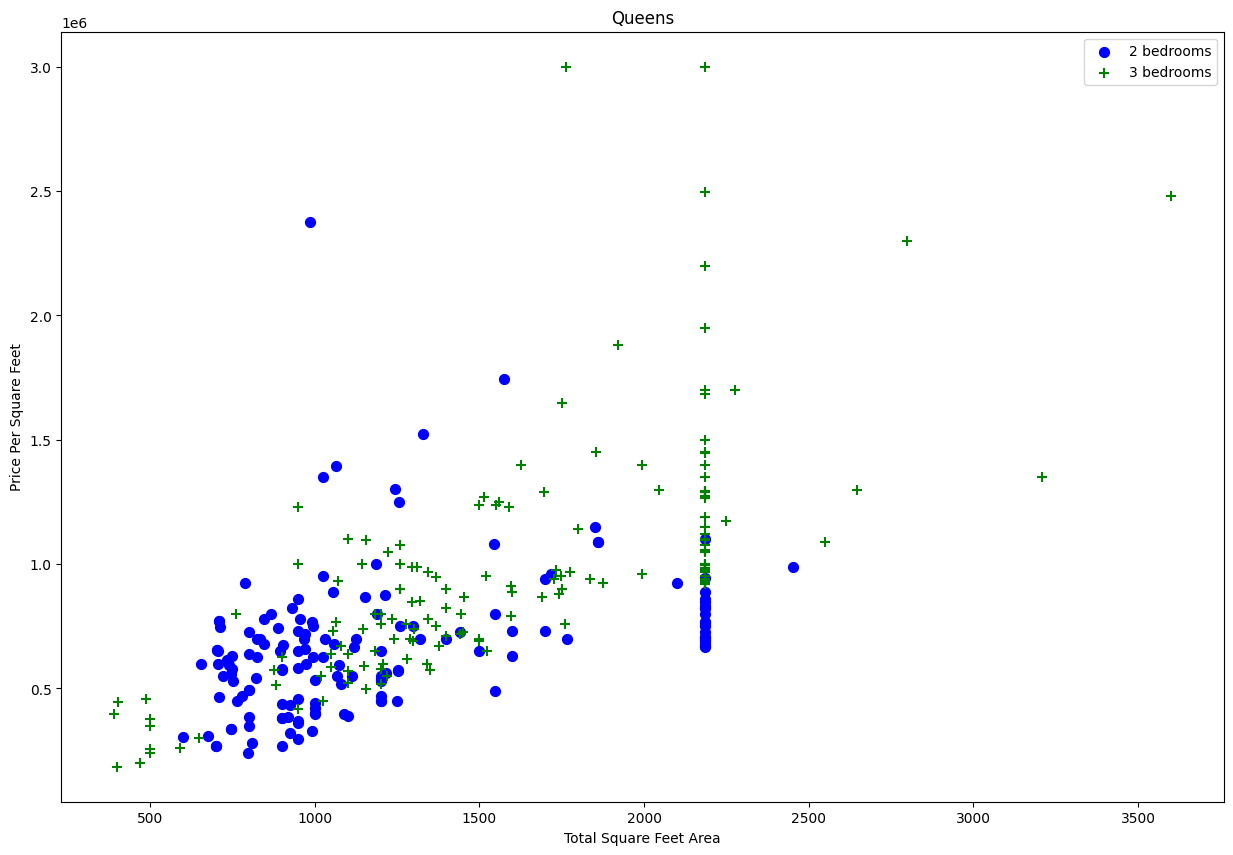

In [105]:
def remove_outliers(df, column_x, column_y, threshold=3):
    # Calculate the Z-scores for the y column
    mean_y = np.mean(df[column_y])
    std_y = np.std(df[column_y])
    df['z_score_y'] = (df[column_y] - mean_y) / std_y
    
    # Filter out the outliers
    df_filtered = df[np.abs(df['z_score_y']) < threshold]
    
    # Drop the z_score_y column
    df_filtered = df_filtered.drop(columns=['z_score_y'])
    
    return df_filtered

# Example usage
# Assuming df is your DataFrame and 'PROPERTYSQFT' is the x column and 'PRICE_PER_SQFT' is the y column
df6 = remove_outliers(df5, 'PROPERTYSQFT', 'PRICE_PER_SQFT')

# Plotting the filtered data
def plot_data(df, column_x, column_y):
    plt.figure(figsize=(10, 6))
    plt.scatter(df[df['BEDS'] == 2][column_x], df[df['BEDS'] == 2][column_y], label='2 bedrooms', color='blue')
    plt.scatter(df[df['BEDS'] == 3][column_x], df[df['BEDS'] == 3][column_y], label='3 bedrooms', color='green', marker='+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title('Staten Island')
    plt.legend()
    plt.show()

# Assuming df_filtered is your DataFrame after removing outliers
plot_scatter_chart(df6, "Queens")
df6.shape




Now let's use an histogram to visualize the data distribution of the 'PRICE_PER_SQFT' column.

Text(0, 0.5, 'Count')

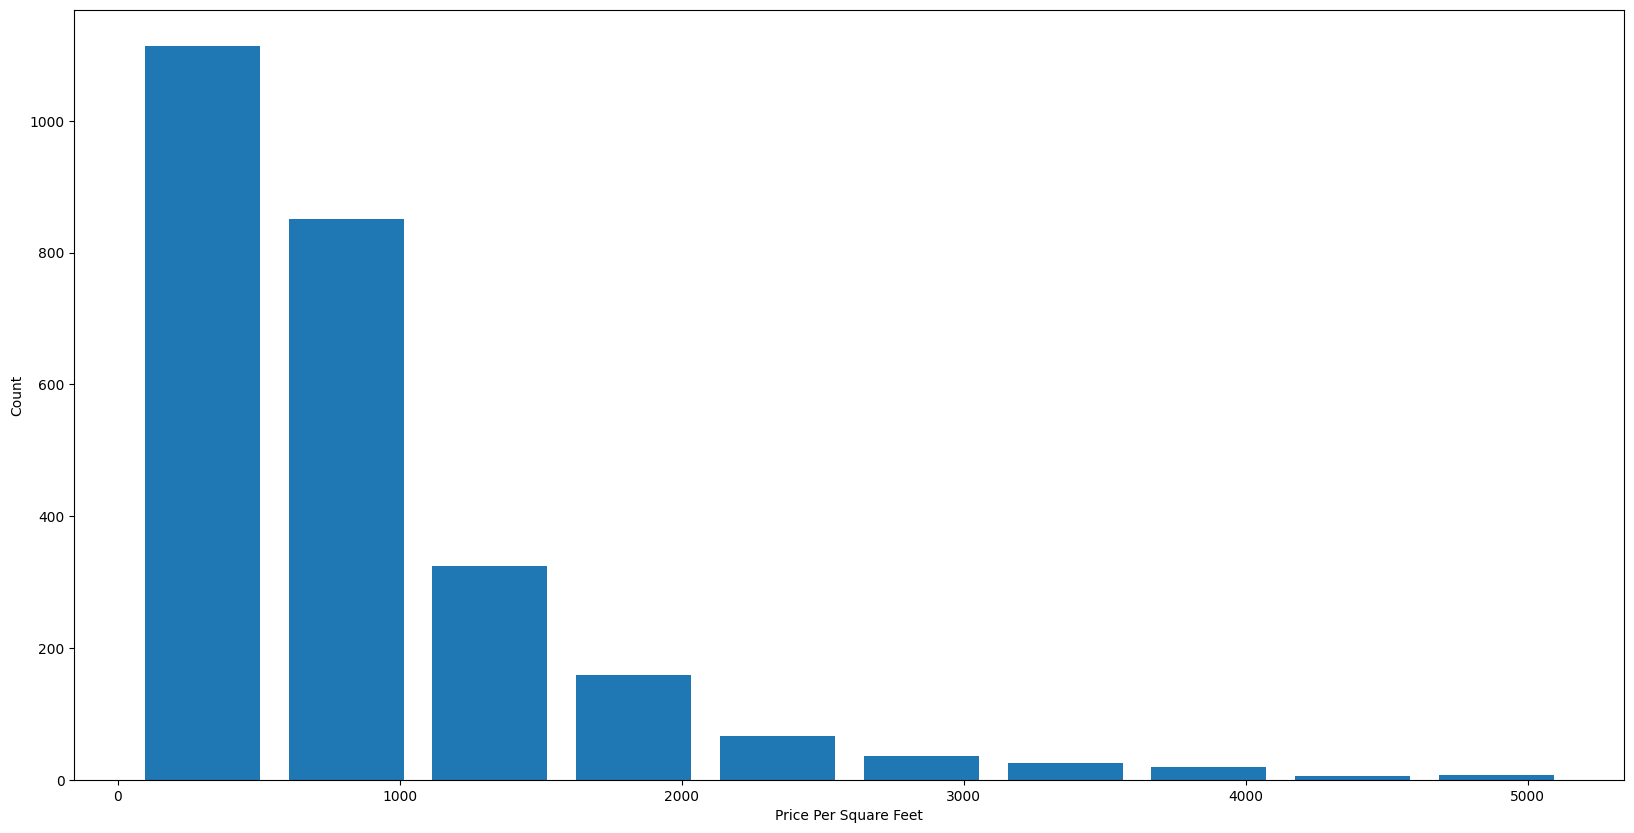

In [106]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.PRICE_PER_SQFT, rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [109]:
df6.BATH.unique()
df6[df6.BATH>5]

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
119,1195000,11,6,2184.207862,Bronx,547.109101
249,1299000,11,8,4560.000000,Bronx,284.868421
250,1279000,16,8,3550.000000,Bronx,360.281690
498,8750000,6,6,2184.207862,Brooklyn,4006.028983
533,3000000,10,10,2184.207862,Brooklyn,1373.495651
...,...,...,...,...,...,...
3893,3750000,13,8,2184.207862,Queens,1716.869564
3921,2780000,14,9,2184.207862,Queens,1272.772637
3956,2499000,18,12,2520.000000,Queens,991.666667
4043,1299888,10,6,3156.000000,Staten Island,411.878327


In [114]:
df6.BATH.unique()
df6[df6.BATH>5]

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
119,1195000,11,6,2184.207862,Bronx,547.109101
249,1299000,11,8,4560.000000,Bronx,284.868421
250,1279000,16,8,3550.000000,Bronx,360.281690
498,8750000,6,6,2184.207862,Brooklyn,4006.028983
533,3000000,10,10,2184.207862,Brooklyn,1373.495651
...,...,...,...,...,...,...
3893,3750000,13,8,2184.207862,Queens,1716.869564
3921,2780000,14,9,2184.207862,Queens,1272.772637
3956,2499000,18,12,2520.000000,Queens,991.666667
4043,1299888,10,6,3156.000000,Staten Island,411.878327


Text(0, 0.5, 'Count')

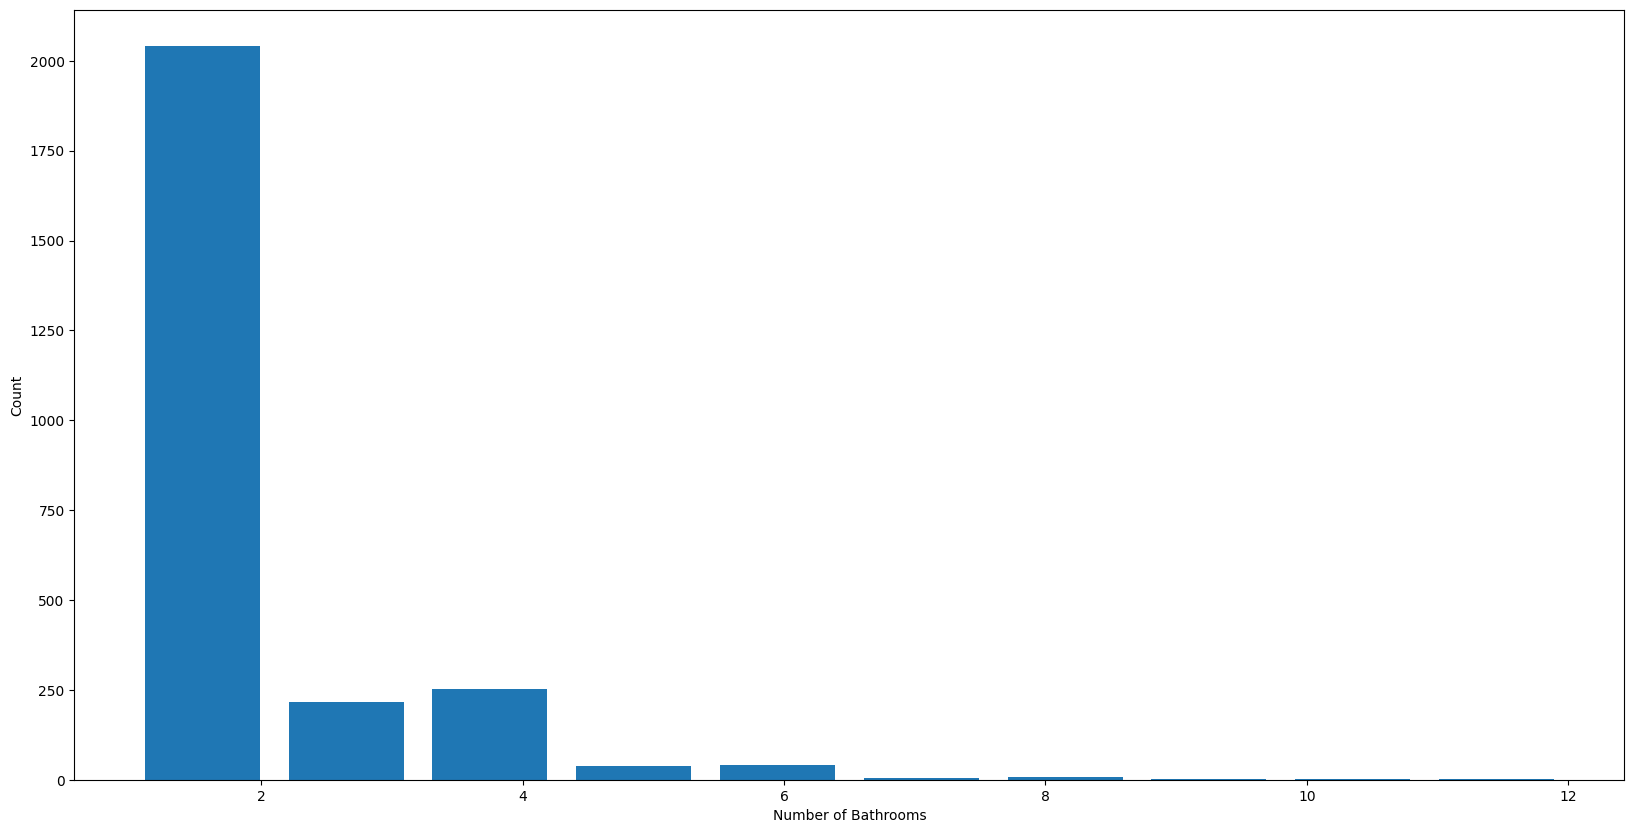

In [115]:
plt.hist(df6.BATH, rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [116]:
df6[df6.BATH>df6.BEDS+2]


,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
619,2295000,3,7,2184.207862,Brooklyn,1050.724173
1556,3400000,3,8,2184.207862,Brooklyn,1556.628405


In [118]:
df7 = df6[~(df6.BATH>df6.BEDS+2)]
df7.shape

(2607, 6)

After removing the outliers for the bathrooms, then we're longer going to use the 'PRICE_PER_SQFT' column. We're going to drop it.

In [120]:
df8 = df7.drop(columns=['PRICE_PER_SQFT'])
df8.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,265000,1,1,750.000000,Bronx
1,375000,2,1,850.000000,Bronx
2,350000,1,1,700.000000,Bronx
6,199900,1,1,2184.207862,Bronx
8,600000,2,2,2184.207862,Bronx


Let's hot encode the 'SUBLOCALITY' column.

In [121]:
pd.get_dummies(df8.SUBLOCALITY)
dummies = pd.get_dummies(df8.SUBLOCALITY)
dummies.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
6,True,False,False,False,False
8,True,False,False,False,False


In [122]:
df9 = pd.concat([df8,dummies], axis='columns')
df9.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,265000,1,1,750.000000,Bronx,True,False,False,False,False
1,375000,2,1,850.000000,Bronx,True,False,False,False,False
2,350000,1,1,700.000000,Bronx,True,False,False,False,False
6,199900,1,1,2184.207862,Bronx,True,False,False,False,False
8,600000,2,2,2184.207862,Bronx,True,False,False,False,False


In [124]:
df10 = df9.drop(columns=['SUBLOCALITY'])
df10.head()
df10.shape

(2607, 9)

Let's save the cleaned dataset.

In [126]:
df10.to_csv('NY-House-Dataset-Preprocessed.csv', index=False)

At this point we're almost finish, let's define our dataframe X and Y.

In [125]:
X = df10.drop(columns=['PRICE'])
Y = df10.PRICE

Let's split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)